## 데이터셋 설명
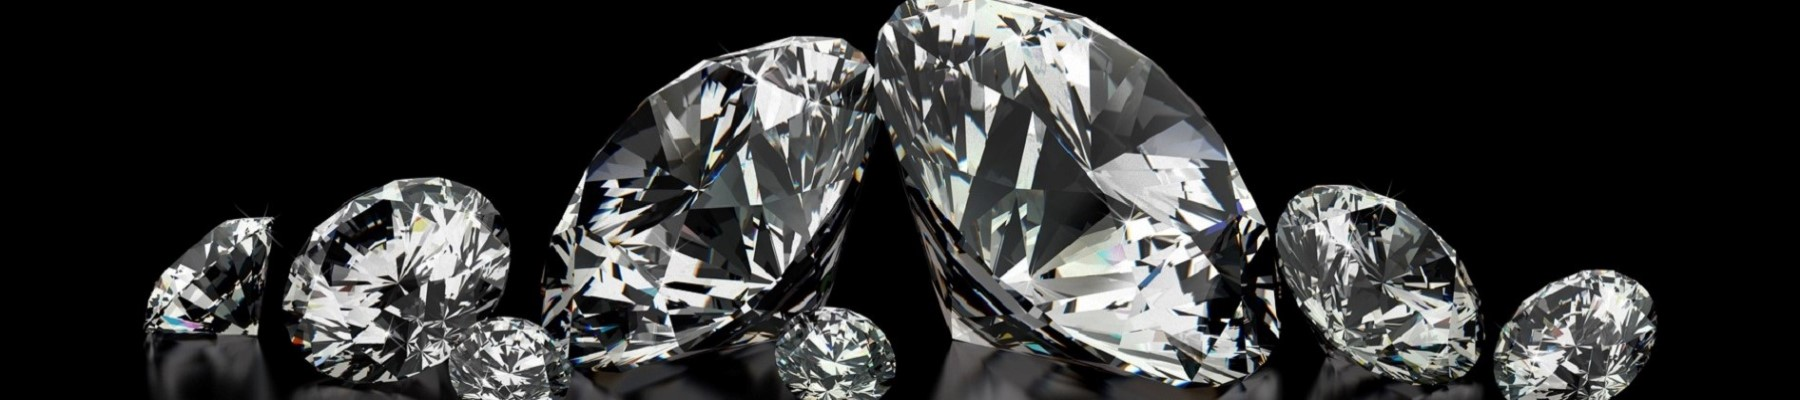

seaborn 라이브러리의 diamonds 데이터셋은 10개의 칼럼, 약 54000개의 행을 가지고 있습니다.


### 칼럼 설명
* **price**: The price of the diamond in US dollars ($326--$18,823).
<br>가격: 다이아몬드의 가격 (달러로 326--18,823).
<br>

* **carat**: The weight of the diamond (0.2--5.01).
<br>캐럿: 다이아몬드의 무게 (0.2--5.01).
<br>
* **cut**: The quality of the cut (Fair, Good, Very Good, Premium, Ideal).
<br>컷: 컷팅의 품질 (Fair, Good, Very Good, Premium, Ideal).
<br>
* **color**: Diamond color, from J (worst) to D (best).
<br>색상: 다이아몬드의 색상, J (최악)에서 D (최고)까지.
<br>
* **clarity**: A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)).
<br>선명도: 다이아몬드의 선명도 측정 (I1 (최악), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (최고)).
<br>
* **x**: Length in mm (0--10.74).
<br>x (길이): 밀리미터 단위의 길이 (0--10.74).
<br>
* **y**: Width in mm (0--58.9).
<br>y (너비): 밀리미터 단위의 너비 (0--58.9).
<br>
* **z**: Depth in mm (0--31.8).
<br>z (깊이): 밀리미터 단위의 깊이 (0--31.8).
<br>
* **depth**: Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79).
<br>깊이 비율: 총 깊이 비율 = z / (x, y의 평균) = 2 * z / (x + y) (43--79).
<br>
* **table**: Width of top of diamond relative to widest point (43--95).
<br>테이블: 다이아몬드 상단의 폭이 가장 넓은 지점에 대한 상대적 폭 (43--95).
<br>


https://www.kaggle.com/datasets/shivam2503/diamonds
더 자세한 내용은 위 링크에서 확인할 수 있습니다.

## 데이터셋 다운로드

In [1]:
import seaborn as sns

diamonds = sns.load_dataset('diamonds')
diamonds

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

## 데이터 살펴보기
데이터의 **칼럼별 자료형**을 살펴보세요!

In [5]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

## 가설 수립
데이터셋을 살펴보고, 다음의 자료형에 맞는 적절한 칼럼 조합을 하나씩 말해주세요.
<br>ex) carat - cut

* 수치형 - 수치형: carat - depth
* 범주형 - 수치형: color - price
* 범주형 - 범주형: cut - clarity

## 가설 검정
4번에서 찾은 조합을 가지고, 데이터셋을 살펴보고 적절한 가설을 세운 후 검정 후 평가해봅시다.

### 수치형 - 수치형
* 귀무가설: carat과 depth 두 변수간 선형 상관관계가 존재하지 않는다.
* 대립가설: carat과 depth 두 변수간 선형 상관관계가 존재한다.

#### 시각화

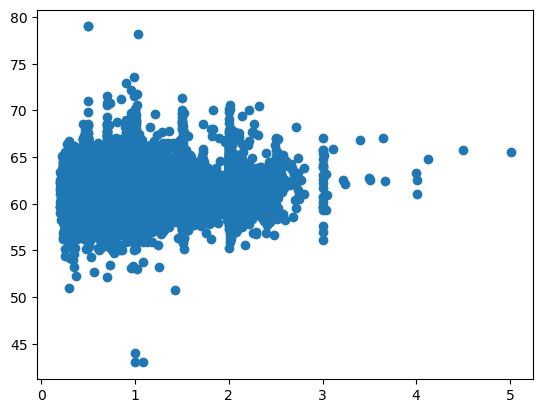

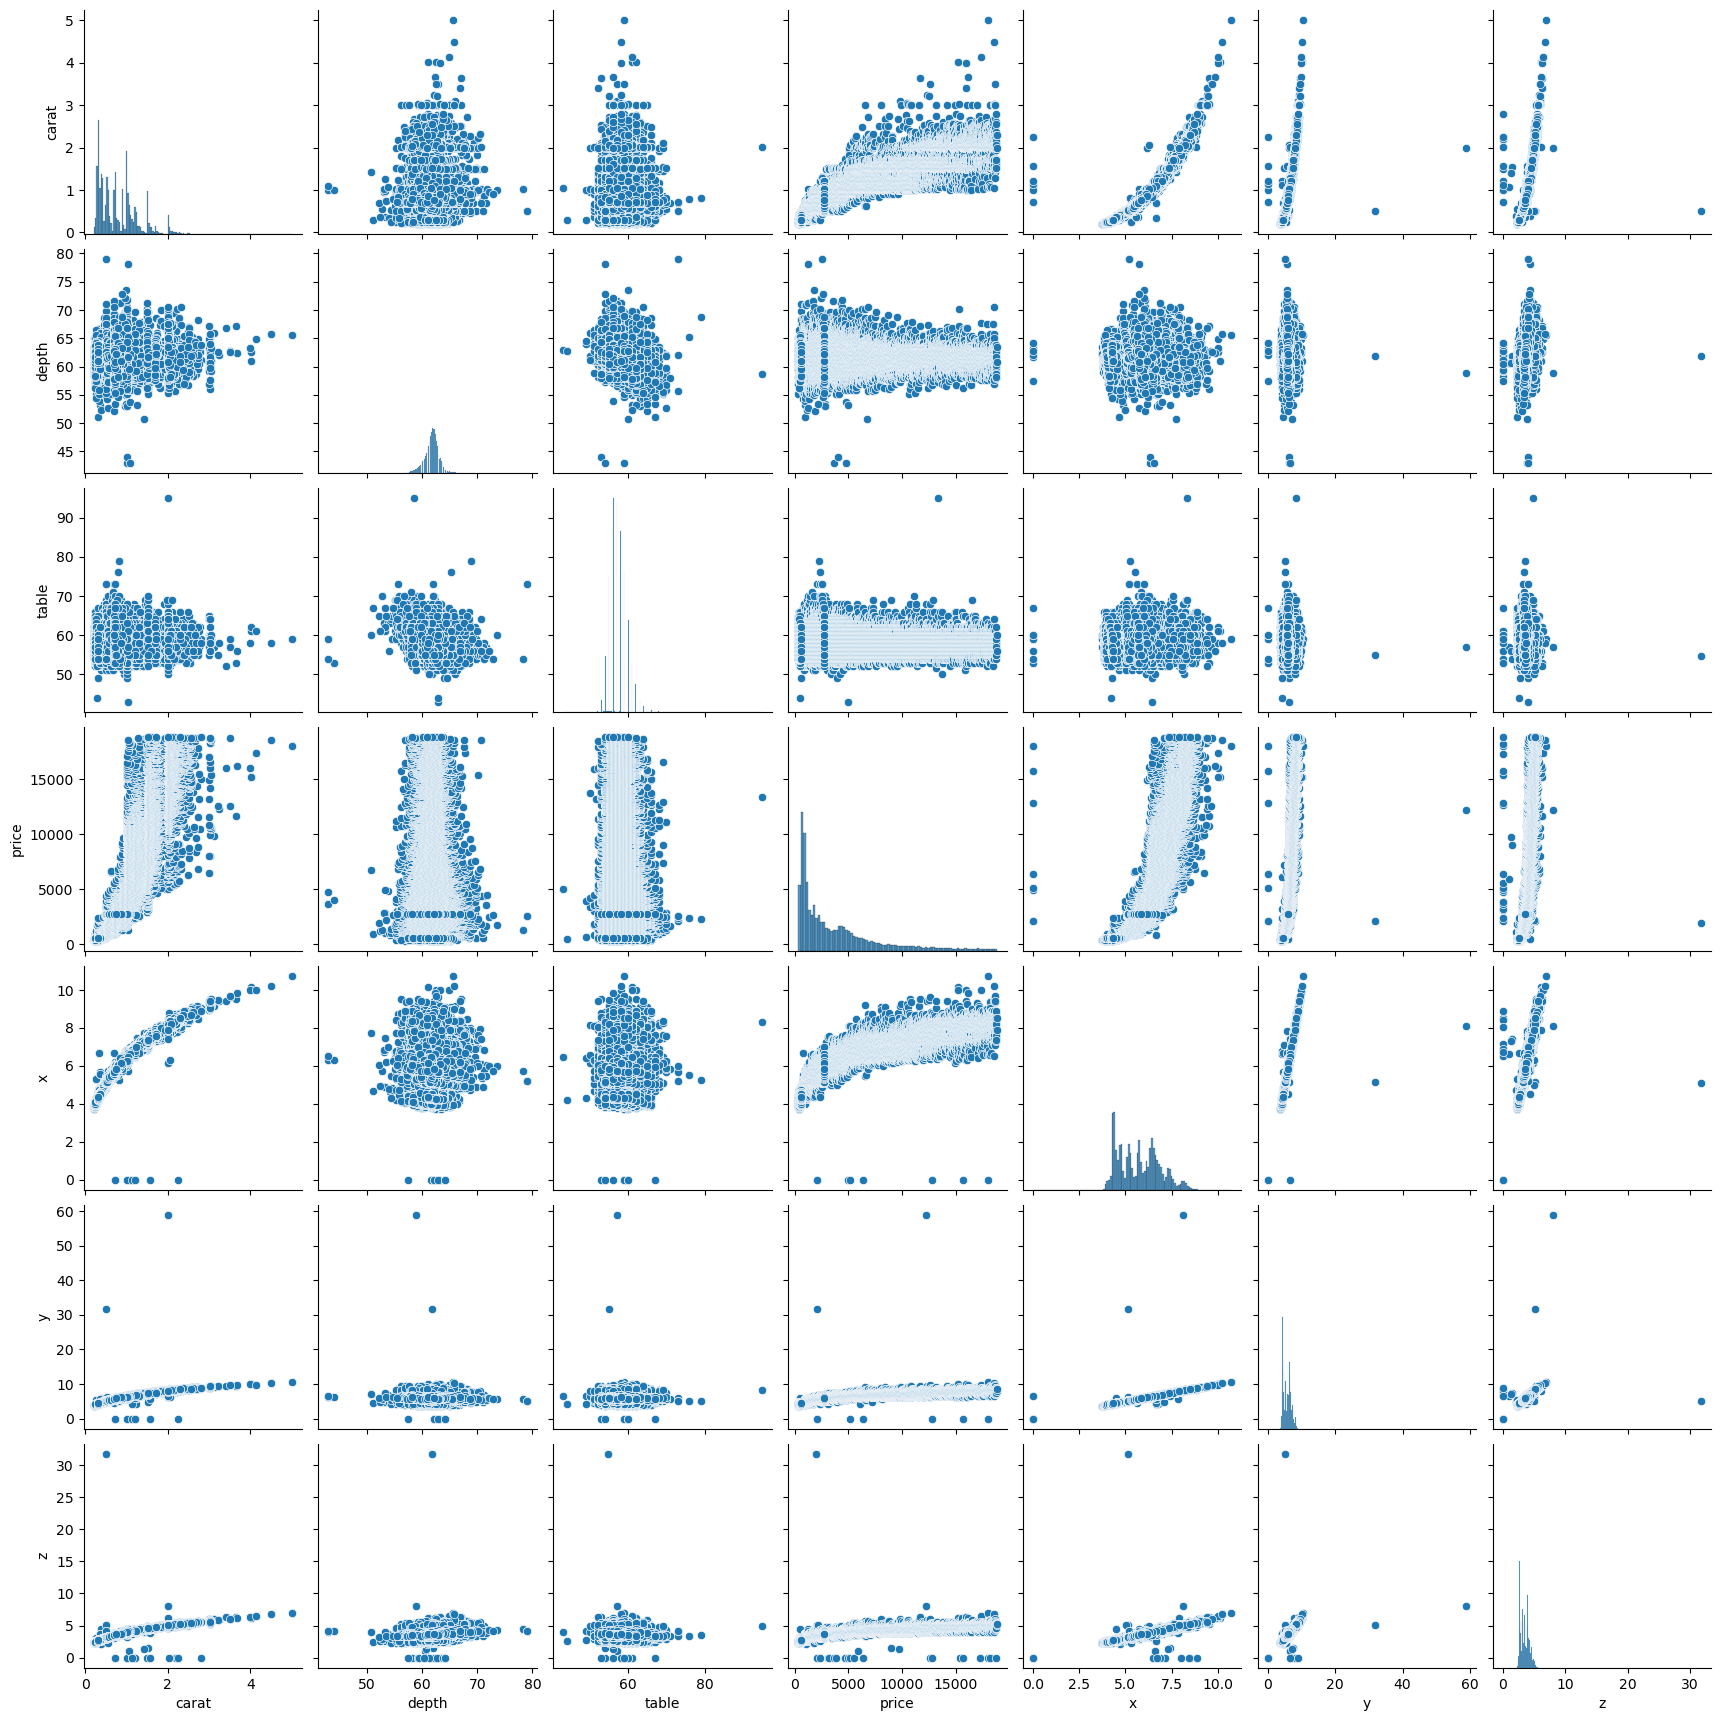

In [25]:
# 시각화 코드를 작성해주세요
plt.scatter(diamonds['carat'], diamonds['depth'])
sns.pairplot(diamonds)

#### 수치화

In [9]:
# 여기에 검정을 수행하는 코드를 적어주세요.
import scipy.stats as spst
spst.pearsonr(diamonds['carat'], diamonds['depth'])

PearsonRResult(statistic=np.float64(0.028224314279048198), pvalue=np.float64(5.517870290340097e-11))

<여기에 검정 결과를 해석해주세요>         
p-value < 0.05 => 귀무가설 기각, carat과 depth는 통계적으로 유의미한 차이 있음         
|r|<0.3 => carat과 depth 두 변수간 상관관계가 약하다.

### 범주형 - 수치형
* 귀무가설: 각 color 별 price 평균은 차이가 없다.
* 대립가설: 각 color 별 price 평균은 차이가 있다. 

#### 시각화

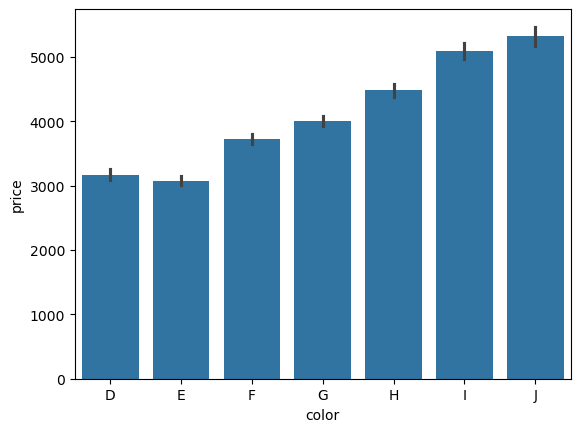

In [14]:
# 시각화 코드를 작성해주세요
sns.barplot(x = 'color', y = 'price', data = diamonds)
plt.show()

#### 수치화

In [17]:
# 여기에 검정을 수행하는 코드를 적어주세요.
D = diamonds.loc[diamonds['color']=='D', 'price']
E = diamonds.loc[diamonds['color']=='E', 'price']
F = diamonds.loc[diamonds['color']=='F', 'price']
G = diamonds.loc[diamonds['color']=='G', 'price']
H = diamonds.loc[diamonds['color']=='H', 'price']
I = diamonds.loc[diamonds['color']=='I', 'price']
J = diamonds.loc[diamonds['color']=='J', 'price']
spst.f_oneway(D, E, F, G, H, I, J)

F_onewayResult(statistic=np.float64(290.20588071108824), pvalue=np.float64(0.0))

<여기에 검정 결과를 해석해주세요>       
p-value < 0.05 => 귀무가설 기각, 각 color 별 price 평균은 통계적으로 유의미한 차이 있음.     
f ~ 290.21 => 각 color 별 price 평균은 차이가 크다

### 범주형 - 범주형
* 귀무가설: cut과 clarity는 관련이 없다.
* 대립가설: cut과 clarity는 관련이 있다. 

#### 시각화

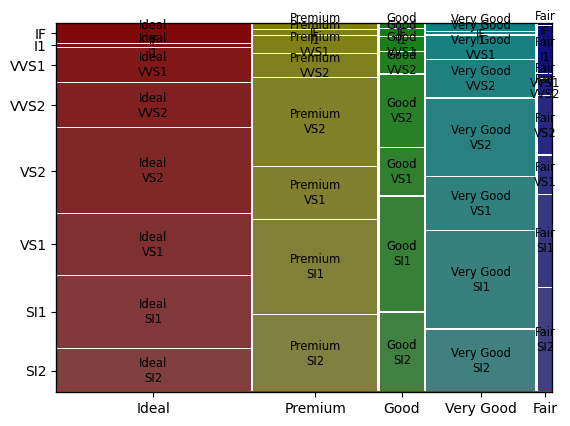

In [ ]:
# 시각화 코드를 작성해주세요
from statsmodels.graphics.mosaicplot import mosaic

mosaic(diamonds, ['cut','clarity'])
plt.axhline(color = 'red') 
# plt.axhline(표시할 값, color = '원하는색') 표시할 값에는 어떤 걸 넣는게 좋은가요?!

#### 수치화

In [23]:
# 여기에 검정을 수행하는 코드를 적어주세요.
import pandas as pd
table = pd.crosstab(diamonds['cut'], diamonds['clarity'])
spst.chi2_contingency(table)

Chi2ContingencyResult(statistic=np.float64(4391.398067200363), pvalue=np.float64(0.0), dof=28, expected_freq=array([[ 715.17037449, 1460.30598813, 2024.05202076, 3264.61292176,
        4897.51868743, 5219.94466073, 3673.33878383,  296.05656285],
       [ 457.65461624,  934.48470523, 1295.23926585, 2089.1038376 ,
        3134.03926585, 3340.36735261, 2350.65728587,  189.45367075],
       [ 400.94141639,  818.68205413, 1134.73140527, 1830.21916945,
        2745.6647386 , 2926.4243604 , 2059.36054876,  165.97630701],
       [ 162.80571005,  332.43288839,  460.76744531,  743.17623285,
        1114.90077864, 1188.29977753,  836.22106044,   67.39610679],
       [  53.42788283,  109.09436411,  151.20986281,  243.88783834,
         365.87652948,  389.96384872,  274.4223211 ,   22.11735261]]))

<여기에 검정 결과를 해석해주세요>   
p-value < 0.05 => 귀무가설을 기각,  cut과 clarity는 관련 있음          
자유도 = 28               
카이제곱 통계량이 자유도의 2배 이상 => 차이가 존재  


고생 많으셨어요:) 회귀 세션도 화이팅!